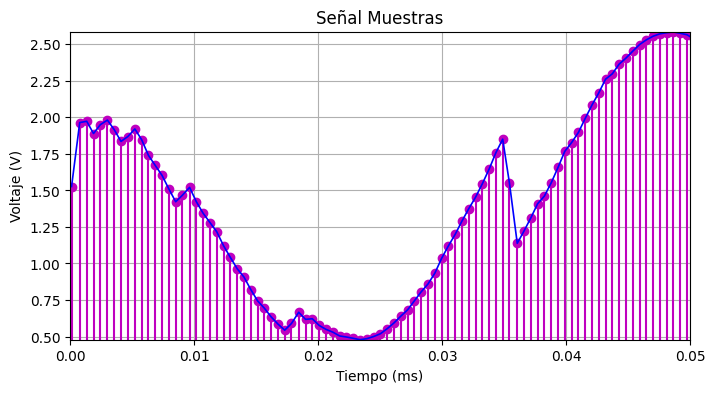

In [25]:
import pandas as pd
import matplotlib.pyplot as plt

# Cargar los datos desde el archivo
filename = "muestras_1.8_1024.txt"
data = pd.read_csv(filename, delimiter="\t")  # Ajustar el delimitador si es necesario

# Extraer columnas
tiempo_ms = data.iloc[:, 0]  # Primera columna (Tiempo en ms)
voltaje = data.iloc[:, 1]    # Segunda columna (Voltaje en V)

# Graficar con stem y línea continua
plt.figure(figsize=(8, 4))
plt.stem(tiempo_ms, voltaje, linefmt='m-', markerfmt='mo', basefmt='m-')  # Stem azul
plt.plot(tiempo_ms, voltaje, 'b-', linewidth=1.2, alpha=1)  # Línea verde semitransparente

# Personalización del gráfico
plt.grid(True)
plt.xlabel('Tiempo (ms)')
plt.ylabel('Voltaje (V)')
plt.title('Señal Muestras')
plt.xlim([0.0,0.05 ])  # Ajustar el límite del eje X
plt.ylim([voltaje.min(), voltaje.max()])  # Ajustar el eje Y según los datos

# Mostrar la gráfica
plt.show()

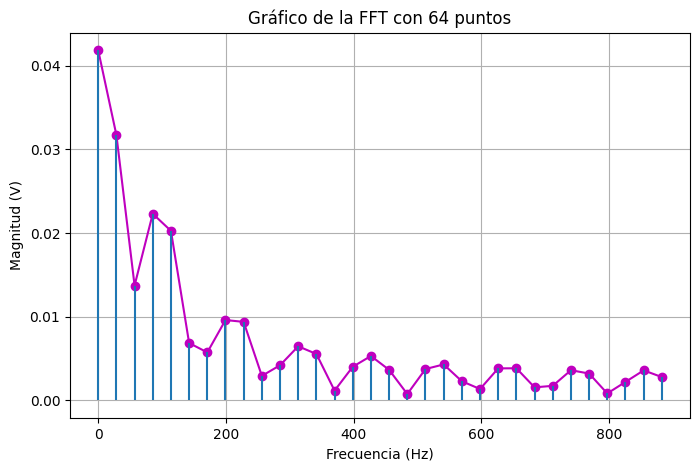

In [16]:
import numpy as np
import matplotlib.pyplot as plt

# Cargar datos desde un archivo .txt
filename = 'fft_1.8_64.txt'  # Reemplazar con el nombre correcto del archivo

# Cargar datos ignorando la primera fila (encabezado)
datos = np.loadtxt(filename, skiprows=1)

# Verificar si el archivo tiene al menos dos columnas
if datos.shape[1] < 2:
    raise ValueError(f'El archivo {filename} debe contener al menos dos columnas: frecuencia y magnitud.')

# Extraer columnas (asumiendo que son frecuencia y magnitud)
frecuencia = datos[:, 0]  # Primera columna -> Frecuencia
magnitud = datos[:, 1]    # Segunda columna -> Magnitud

# Crear la figura
plt.figure(figsize=(8, 5))

# Graficar con línea continua (equivalente a plot en MATLAB)
plt.plot(frecuencia, magnitud, '-o', color='m', label='FFT (plot)')

# Graficar con stem (líneas verticales y puntos, similar a MATLAB)
plt.stem(frecuencia, magnitud, linefmt='', markerfmt='', basefmt=" ")

# Configuración del gráfico
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Magnitud (V)')
plt.title('Gráfico de la FFT con 64 puntos')

plt.grid(True)  # Activar cuadrícula
plt.show()

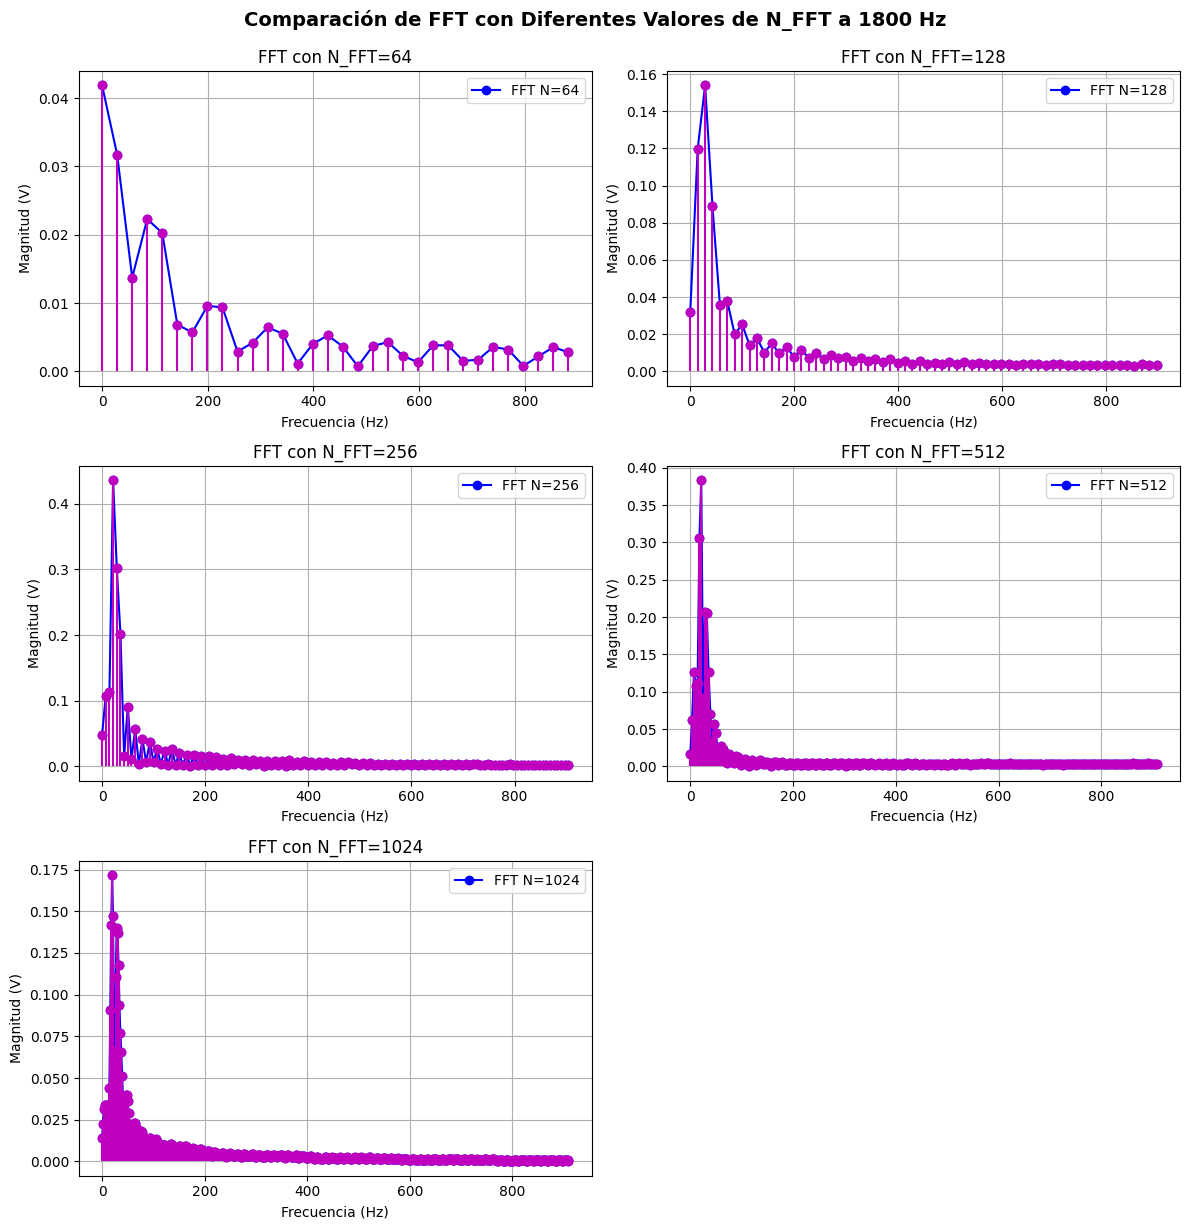

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import os

# Lista de archivos con diferentes valores de N_FFT
archivos = ['fft_1.8_64.txt', 'fft_1.8_128.txt', 'fft_1.8_256.txt', 'fft_1.8_512.txt', 'fft_1.8_1024.txt']
N_FFT_vals = [64, 128, 256, 512, 1024]  # Valores de N_FFT utilizados

# Crear la figura para los subplots
num_subplots = len(archivos)
ncols = 2  # Número de columnas (ajustado a 2)
nrows = (num_subplots + ncols - 1) // ncols  # Número de filas (ajustado a la cantidad de subgráficos)

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(12, 12))

# Asegurar que axes sea un arreglo 1D, incluso si hay solo un subplot
axes = axes.flatten()

for i, (filename, N_FFT) in enumerate(zip(archivos, N_FFT_vals)):
    # Verificar si el archivo existe antes de intentar cargarlo
    if not os.path.isfile(filename):
        print(f'Advertencia: El archivo {filename} no se encuentra. Se omite este subplot.')
        continue

    # Cargar datos desde el archivo
    datos = np.loadtxt(filename, skiprows=1)

    # Verificar si el archivo tiene al menos dos columnas
    if datos.shape[1] < 2:
        raise ValueError(f'El archivo {filename} debe contener al menos dos columnas: frecuencia y magnitud.')

    # Extraer columnas
    frecuencia = datos[:, 0]
    magnitud = datos[:, 1]

    # Seleccionar el subplot correspondiente
    ax = axes[i]

    # Graficar la FFT con línea continua y marcadores
    ax.plot(frecuencia, magnitud, '-o', color='b', linewidth=1.5, label=f'FFT N={N_FFT}')

    # Graficar con stem para visualizar los valores discretos
    ax.stem(frecuencia, magnitud, linefmt='m-', markerfmt='mo', basefmt=" ")

    # Configuración del gráfico
    ax.set_xlabel('Frecuencia (Hz)')
    ax.set_ylabel('Magnitud (V)')
    ax.set_title(f'FFT con N_FFT={N_FFT}')
    ax.legend()
    ax.grid(True)

# Eliminar subgráficos vacíos si existen
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Ajustar diseño de los subgráficos
plt.tight_layout()
plt.suptitle('Comparación de FFT con Diferentes Valores de N_FFT a 1800 Hz', fontsize=14, fontweight='bold', y=1.02)
plt.show()